<a href="https://colab.research.google.com/github/sagsshakya/Deep-Learning/blob/master/Toyota%20Dataset/Multiple_Regression_Attempt_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libraries.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Loading the pickled file as a DataFrame.

In [5]:
uploaded = files.upload()

Saving toyota_cleaned.pkl to toyota_cleaned (1).pkl


In [6]:
import io
df = pd.read_pickle(io.BytesIO(uploaded['toyota_cleaned.pkl']))
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Price_category,Age_category
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,3,1165,High,New
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165,High,New
2,13950,24.0,41711.0,Diesel,90.0,0.0,0,2000,3,1165,High,New
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165,High,New
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170,High,Medium


# General visualization of the data.

<Figure size 1440x1080 with 0 Axes>

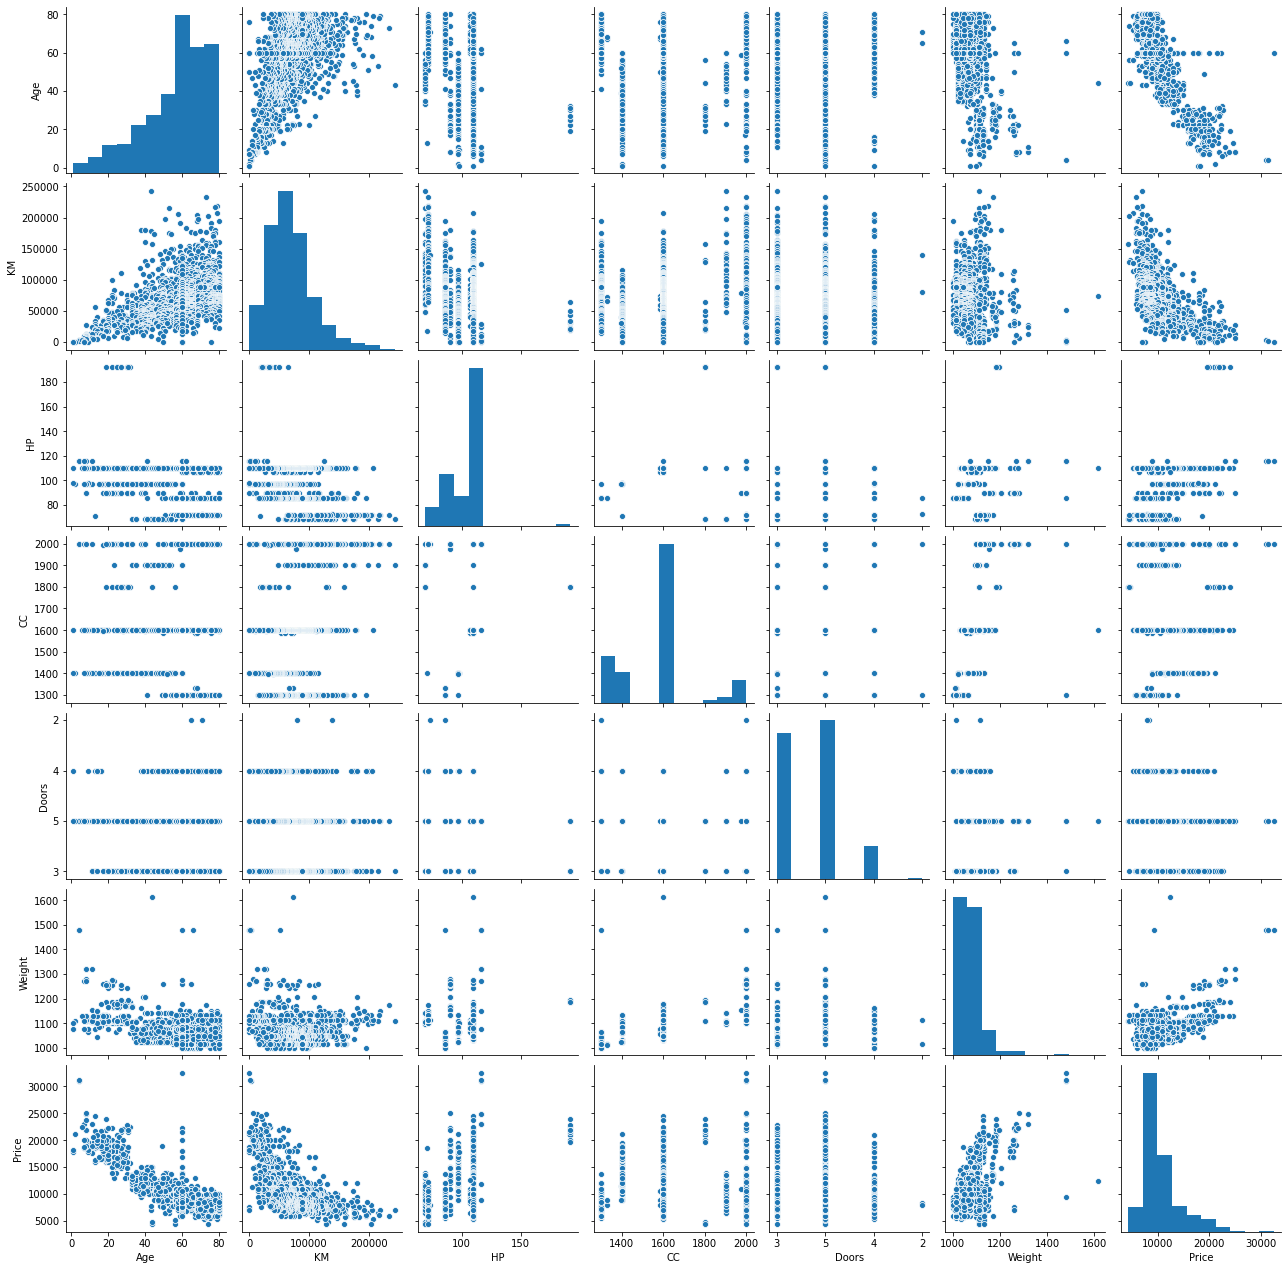

In [16]:
plt.figure(figsize = (20,15))

sns.pairplot(df[['Age', 'KM', 'HP', 'CC', 'Doors', 'Weight', 'Price']], palette = 'coolwarm')
plt.show()

# Scaling the numerical features using MinMaxScaler.

In [18]:
# getting the numerical features first.

X = df[['Age', 'KM', 'HP', 'CC', 'Weight']]

# Scaling the data using MinMax Scaler.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X[['Age', 'KM', 'HP', 'CC', 'Weight']])
X_scaled = pd.DataFrame(X_scaled, columns = ['Age', 'KM', 'HP', 'CC', 'Weight'])
X_scaled['Doors'] = df['Doors']
X_scaled.head()

,Age,KM,HP,CC,Weight,Doors
0,0.278481,0.193355,0.170732,1.0,0.268293,3
1,0.278481,0.300149,0.170732,1.0,0.268293,3
2,0.291139,0.171647,0.170732,1.0,0.268293,3
3,0.316456,0.197528,0.170732,1.0,0.268293,3
4,0.367089,0.158433,0.170732,1.0,0.276423,3


# Encoding the categorical variables using dummies.
- **Dummy Variable Trap**:
    - The Dummy variable trap is a scenario where there are attributes which are highly correlated (Multicollinear) and one variable predicts the value of others. 
    - Then, one dummy variable (attribute) can be predicted with the help of other dummy variables. Hence, one dummy variable is highly correlated with other dummy variables. 
    - So, the regression models should be designed excluding one dummy variable.
    - The level with no dummy variable is known as the ***baseline***.

In [23]:
# One hot encoding the categorical features.
fuel_type_dummy = pd.get_dummies(df['FuelType'], drop_first = True, prefix='fuel_type')
met_color_dummy = pd.get_dummies(df['MetColor'], drop_first = True)
automatic_dummy = pd.get_dummies(df['Automatic'], drop_first = True)

automatic_dummy.columns = ['Automatic']
met_color_dummy.columns = ['MetColor']


# Independent Features: X_mod.

In [28]:
# Final scaled independent variables.
X_mod = pd.concat([X_scaled, fuel_type_dummy, met_color_dummy, automatic_dummy], axis=1, ignore_index=True)
X_mod.columns = list(X_scaled.columns) + list(fuel_type_dummy.columns)+ list(met_color_dummy.columns) + list(automatic_dummy.columns)
X_mod.head()

,Age,KM,HP,CC,Weight,Doors,fuel_type_Diesel,fuel_type_Petrol,MetColor,Automatic
0,0.278481,0.193355,0.170732,1.0,0.268293,3,1,0,1,0
1,0.278481,0.300149,0.170732,1.0,0.268293,3,1,0,1,0
2,0.291139,0.171647,0.170732,1.0,0.268293,3,1,0,0,0
3,0.316456,0.197528,0.170732,1.0,0.268293,3,1,0,0,0
4,0.367089,0.158433,0.170732,1.0,0.276423,3,1,0,0,0


# Target Feature: Y.

In [30]:
# The target variable for our regression problem.
Y = df['Price'].values

# Train - test split.

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_mod, Y, test_size = .25, random_state = 100)

# Approach : Multiple Linear Regression.

### Training the model.

In [33]:
from sklearn.linear_model import LinearRegression as LR
linear_reg = LR()
linear_reg.fit(x_train, y_train) 
training_predictions = linear_reg.predict(x_train)

### Evaluating the model.

In [35]:
# Defining the Metrics.
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# defining root mean squared error.
root_mean_squared_error = lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False) 

# Evaluation.
def model_evaluation(Y_true, Y_pred):
    print('Mean Squared Error = ', round(mean_squared_error(Y_true, Y_pred), 3))
    print('Mean Absolute Error = ', round(mean_absolute_error(Y_true, Y_pred), 3))
    print('Median Squared Error = ', round(median_absolute_error(Y_true, Y_pred), 3))    
    print('Root Mean Squared Error = ', round(root_mean_squared_error(Y_true, Y_pred), 3))


In [37]:
# For training data.
print('FOR TRAINING DATA:\n')
model_evaluation(y_train, training_predictions)

# For testing data.
print('FOR TESTING DATA:\n')
model_evaluation(y_test, linear_reg.predict(x_test))

FOR TRAINING DATA:

Mean Squared Error =  2167929.169
Mean Absolute Error =  1029.175
Median Squared Error =  812.134
Root Mean Squared Error =  1472.389
FOR TESTING DATA:

Mean Squared Error =  1914067.219
Mean Absolute Error =  954.752
Median Squared Error =  725.895
Root Mean Squared Error =  1383.498


***Our model is clearly under - fitting as the training error > testing error.***<br>
***The Mean Squared Error is large. It might be due to the outliers in the dataset.***

# Visualization using residuals.

In [65]:
# Visualization.

def prediction_visual(y_train, training_prediction, y_test, testing_prediction):
    plt.figure(figsize=(20,20))
    plt.style.use('ggplot')
 
    # for training data.
    plt.subplot(2,2,1)
    sns.regplot(y_train, training_prediction,
                marker = 'X', color = 'steelblue',
                scatter_kws={'s':3},
                line_kws={'color':'darkred', 'linestyle': 'dotted', 'linewidth': 1.8})
    plt.title('Training Data')
    plt.xlabel('Y_train')
    plt.ylabel('Y_predicted')

    # for testing data.
    plt.subplot(2,2,2)
    sns.regplot(y_test, testing_prediction,
                marker = 'X', color = 'steelblue',
                scatter_kws={'s':3},
                line_kws={'color':'darkred', 'linestyle': 'dotted', 'linewidth': 1.8})
    plt.title('Testing Data')
    plt.xlabel('Y_test')
    plt.ylabel('Y_predicted')

    # Residual Plots.

    # For training data.
    assert(y_train.shape == training_prediction.shape)
    training_prediction.reshape(y_train.shape)
    residue_train = y_train - training_prediction           # residuals for training examples.
   
    plt.subplot(2,2,3)
    sns.scatterplot(x = training_prediction, y = residue_train, size = 5, markers='*', color = 'brown', alpha = .5)
    plt.hlines(0,xmin=0, xmax=training_prediction.max() + 100, linestyles='dotted')
    plt.xlabel('Y_prediction')
    plt.ylabel('Residuals')
    plt.title('Residual plot for training data.')

    # For testing data.
    assert(y_test.shape == testing_prediction.shape)
    testing_prediction.reshape(y_test.shape)
    residue_test = y_test - testing_prediction           # residuals for testing examples.
   
    plt.subplot(2,2,4)
    sns.scatterplot(x = testing_prediction, y = residue_test, size = 5, markers='*', color = 'slateblue')
    plt.hlines(0,xmin=0, xmax=testing_prediction.max() + 100, linestyles='dotted')

    plt.xlabel('Y_prediction')
    plt.ylabel('Residuals')
    plt.title('Residual plot for testing data.')

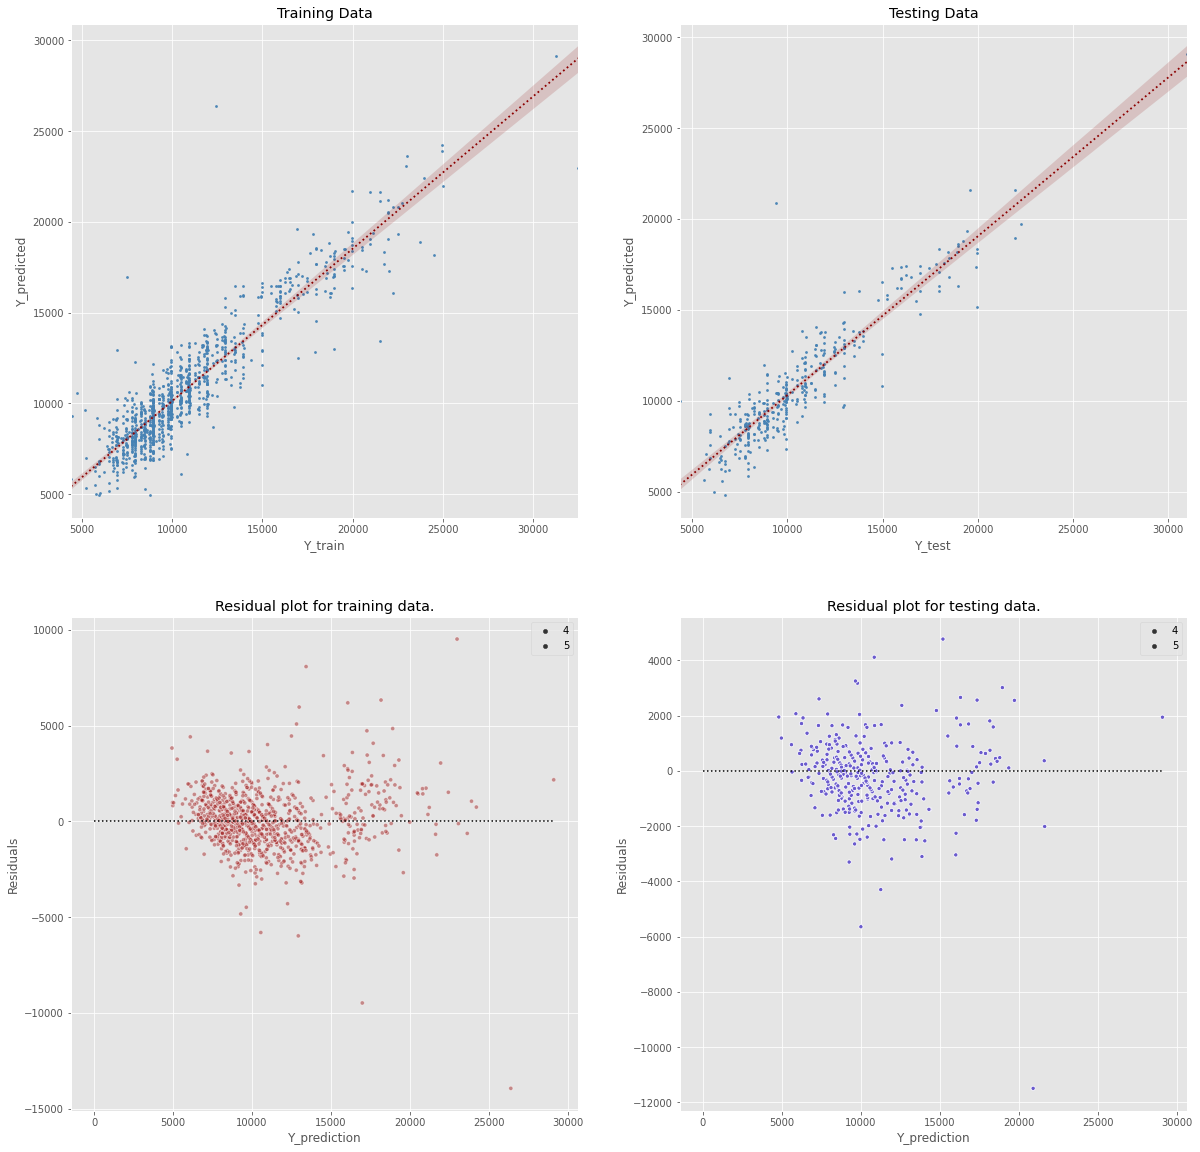

In [66]:
prediction_visual(y_train, training_predictions, y_test, linear_reg.predict(x_test))

**We find out from the residual plots that:**
- There are outliers in the data especially in the higher prices region.
- Y - axis Imbalance.
- X - axis Imbalance.

*Possble fix*: Transformation of the variable that possesses an asymmetric distribution.


<hr>

***We go back to pre - processing our data hoping to fix this issue.***

# Tasks at hand:
- Apply feature transformations to Price, Age, KM, HP, CC, Weight
    - log transform
    - Power Transformer {Box - Cox transform}
- Outliers in the Weight.
- Possibly decrease the first (lower) partition value in the Price_category feature to avoid class imbalance.
- Solve the class imbalance problem in FuelType, Automatic, 
- Feature selection:
    - chi2 score
    - mutual_info_classif

# Notes:
- For a dichotomous categorical variable and a continuous variable you can calculate a *Pearson correlation* if the categorical variable has a 0/1-coding for the categories. This correlation is then also known as a **point-biserial correlation coefficient**.
-  FOr more than two levels, you should use *Eta-squared*, or eta, as an effect-size measure for the relationship of a categorical variable and a continuous variable.

# To be continued...

# Pickling the encoded Categorical features.

In [69]:
categorical_features_encoded =  pd.concat([fuel_type_dummy, met_color_dummy, automatic_dummy], axis=1, ignore_index=True)
categorical_features_encoded.columns = list(fuel_type_dummy.columns)+ list(met_color_dummy.columns) + list(automatic_dummy.columns)
categorical_features_encoded.to_pickle('Categorical Features Encoded.pkl')
files.download('Categorical Features Encoded.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Pickling the scaled numeric features.

In [70]:
X_scaled.to_pickle('Numeric scaled MinMax.pkl')
files.download('Numeric scaled MinMax.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>